In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!mkdir -p ~/.kaggle
import json 
token = {"username":"seunghwan1228","key":"2a8fb35ecd319bf10a02713c306059ca"}
with open('/content/drive/My Drive/Colab Notebooks/Kaggle Kernel/kaggle.json', 'w') as file:
  json.dump(token, file)
  
!cp drive/'My Drive'/'Colab Notebooks'/'Kaggle Kernel'/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

# down load path
# !kaggle competitions download -c jigsaw-unintended-bias-in-toxicity-classification
# !kaggle competitions download -c aptos2019-blindness-detection

kaggle.json
total 4
-rw------- 1 root root 72 Dec 16 13:26 kaggle.json
{"username": "seunghwan1228", "key": "2a8fb35ecd319bf10a02713c306059ca"}

In [0]:
!kaggle datasets list

In [0]:
!kaggle datasets list -s Resized

In [4]:
!kaggle datasets download benjaminwarner/resized-2015-2019-blindness-detection-images

100% 17.3G/17.3G [03:50<00:00, 107MB/s] 
100% 17.3G/17.3G [03:50<00:00, 80.7MB/s]


In [0]:
import os
# os.mkdir('/content/test_images_2019')
# os.mkdir('/content/train_images_2019')

In [0]:
# !cp /content/sample_submission.csv /content/sample_submission_2019.csv
# !cp /content/test.csv /content/test_2019.csv
# !cp /content/train.csv /content/train_2019.csv
# !unzip /content/train_images.zip -d /content/train_images_2019
# !unzip /content/test_images.zip -d /content/test_images_2019

In [6]:
# Get 2015 & 2019 datasets

!nohup unzip resized-2015-2019-blindness-detection-images.zip

nohup: ignoring input and appending output to 'nohup.out'


## Coding Part

In [64]:
!pip install keras-efficientnets

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 
import keras

In [0]:
df_train_19 = pd.read_csv('/content/labels/trainLabels19.csv')
df_train_15 = pd.read_csv('/content/labels/trainLabels15.csv')
df_test_15 = pd.read_csv('/content/labels/testLabels15.csv')

In [67]:
print(os.listdir('/content/resized train 19')[:3])
print(os.listdir('/content/resized train 15')[:3])


['fdd534271f3d.jpg', 'd968a983d4d2.jpg', '46c1548d730e.jpg']
['5533_left.jpg', '13942_left.jpg', '25448_left.jpg']


In [68]:
df_train_19.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [69]:
df_train_15.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [0]:
## creat one folder and df

os.mkdir('train_merge')

In [0]:
!cp -r '/content/resized train 15' '/content/train_merge/'
!cp -r '/content/resized train 19' '/content/train_merge/'

In [0]:
!rsync -a '/content/train_merge/resized train 15' '/content/train_merge/resized train 19'

In [73]:
len(os.listdir('/content/train_merge/resized train 19'))

3663

In [74]:
len(os.listdir('/content/train_merge/resized train 15'))

35126

In [75]:
len(os.listdir('/content/resized train 15'))

35126

In [0]:
import shutil

In [0]:
moveto = '/content/train_merge/resized train 15/'
source = '/content/train_merge/resized train 19/'

for img_file in os.listdir('/content/train_merge/resized train 19'):
  source_file = source + img_file
  dest_file = moveto + img_file
  shutil.move(source_file, dest_file)

In [78]:
print(source_file)

/content/train_merge/resized train 19/4294a14c656a.jpg


In [79]:
len(os.listdir('/content/train_merge/resized train 15'))

38789

In [80]:
35126 + 3662

38788

In [0]:
def add_jpg(x):
  x = str(x)
  return x + '.jpg'

In [82]:
add_jpg(df_train_19['id_code'][0])

'000c1434d8d7.jpg'

In [0]:
df_train_19['image_path'] = df_train_19['id_code'].apply(add_jpg)
df_train_15['image_path'] = df_train_15['image'].apply(add_jpg)

In [84]:
df_train_19.head()

,id_code,diagnosis,image_path
0,000c1434d8d7,2,000c1434d8d7.jpg
1,001639a390f0,4,001639a390f0.jpg
2,0024cdab0c1e,1,0024cdab0c1e.jpg
3,002c21358ce6,0,002c21358ce6.jpg
4,005b95c28852,0,005b95c28852.jpg


In [85]:
df_train_15.head()

,image,level,image_path
0,10_left,0,10_left.jpg
1,10_right,0,10_right.jpg
2,13_left,0,13_left.jpg
3,13_right,0,13_right.jpg
4,15_left,1,15_left.jpg


In [0]:
df_train_15.columns = ['id_code', 'diagnosis', 'image_path']

In [87]:
df_train_15.head()

,id_code,diagnosis,image_path
0,10_left,0,10_left.jpg
1,10_right,0,10_right.jpg
2,13_left,0,13_left.jpg
3,13_right,0,13_right.jpg
4,15_left,1,15_left.jpg


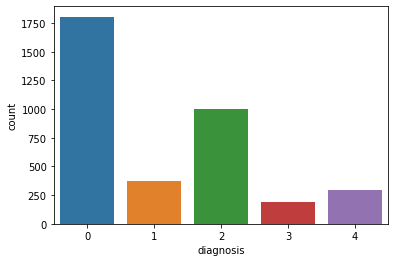

In [88]:
sns.countplot(df_train_19['diagnosis'])

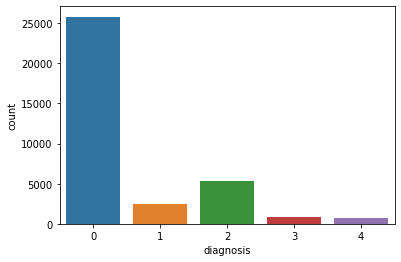

In [89]:
sns.countplot(df_train_15['diagnosis'])

In [0]:
merge_df = pd.concat([df_train_19, df_train_15])

In [91]:
merge_df.head()

,id_code,diagnosis,image_path
0,000c1434d8d7,2,000c1434d8d7.jpg
1,001639a390f0,4,001639a390f0.jpg
2,0024cdab0c1e,1,0024cdab0c1e.jpg
3,002c21358ce6,0,002c21358ce6.jpg
4,005b95c28852,0,005b95c28852.jpg


In [0]:
merge_df.drop('id_code', axis=1, inplace=True)

In [0]:
from keras.preprocessing import image

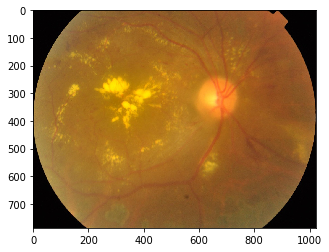

In [94]:
sample_image = '/content/resized train 19/fdd534271f3d.jpg'


img_sample = plt.imread(sample_image)
plt.imshow(img_sample)

In [0]:
def preprocess_img(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # image = crop_image_from_gray(image)
  image = cv2.addWeighted (image,4, cv2.GaussianBlur(image, (0,0) ,sigmaX=10), -4, 128)
  return image

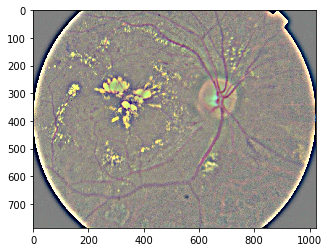

In [96]:
img_sample_2 = cv2.imread(sample_image)
plt.imshow(preprocess_img(img_sample_2))

In [97]:
merge_df.head()

,diagnosis,image_path
0,2,000c1434d8d7.jpg
1,4,001639a390f0.jpg
2,1,0024cdab0c1e.jpg
3,0,002c21358ce6.jpg
4,0,005b95c28852.jpg


In [0]:
from sklearn.model_selection import train_test_split

## Pre Train with 2015 data

In [0]:
x_train, x_test, y_train, y_test = train_test_split(merge_df['image_path'], merge_df['diagnosis'], test_size=0.2, random_state=1228, stratify = merge_df['diagnosis'])

In [100]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(31030,)
(31030,)
(7758,)
(7758,)


In [101]:
train_x = pd.DataFrame(x_train)
train_y = pd.DataFrame(y_train)

test_x = pd.DataFrame(x_test)
test_y = pd.DataFrame(y_test)

train = pd.concat([train_x, train_y], axis=1)
test = pd.concat([test_x, test_y], axis=1)

train['diagnosis'] = train['diagnosis'].astype('str')
test['diagnosis'] = test['diagnosis'].astype('str')

display(train.head())
display(test.head())

,image_path,diagnosis
18,0151781fe50b.jpg,0
29144,36908_left.jpg,0
34039,43041_right.jpg,0
31255,39483_right.jpg,0
7755,9747_right.jpg,0


,image_path,diagnosis
28456,36021_left.jpg,0
33697,42570_right.jpg,0
31364,39626_left.jpg,0
13767,17277_right.jpg,0
11065,13898_right.jpg,0


In [0]:
train_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.,
                                           horizontal_flip=True, 
                                           vertical_flip=True,
                                           rotation_range=360,
                                           width_shift_range=0.3,
                                           height_shift_range=0.3,
                                           shear_range=0.3,
                                           preprocessing_function = preprocess_img
                                           )

test_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [0]:
import warnings

warnings.filterwarnings('ignore')

In [104]:
train_dir = '/content/train_merge/resized train 15'  # <- requires to identify folder

train_gen = train_generator.flow_from_dataframe(train, directory=train_dir, x_col ='image_path', y_col='diagnosis', target_size=(380,380), batch_size=10, color_mode='rgb', seed=1228)

val_gen = test_generator.flow_from_dataframe(test, directory=train_dir, x_col ='image_path', y_col='diagnosis', target_size=(380,380), batch_size=10,color_mode='rgb', seed=1228)

Found 31030 validated image filenames belonging to 5 classes.
Found 7758 validated image filenames belonging to 5 classes.


## Efficient Net input shapes

EfficientNetB0 - (224, 224, 3)

EfficientNetB1 - (240, 240, 3)

EfficientNetB2 - (260, 260, 3)

EfficientNetB3 - (300, 300, 3)

EfficientNetB4 - (380, 380, 3)

EfficientNetB5 - (456, 456, 3)

EfficientNetB6 - (528, 528, 3)

EfficientNetB7 - (600, 600, 3)

In [0]:
from keras_efficientnets import EfficientNetB4

In [106]:
eff= EfficientNetB4(input_shape = (380,380,3), include_top=False)












71720960/71719528 [==============================] - 2s 0us/step


In [107]:
eff.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 380, 380, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 190, 190, 48) 1296        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 190, 190, 48) 192         conv2d_1[0][0]                   
__________________________________________________________________________________________________
swish_1 (Swish)                 (None, 190, 190, 48) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [108]:
model = keras.models.Sequential()
model.add(eff)
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Dense(5, activation='softmax'))

In [109]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 12, 12, 1792)      17673816  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1792)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 8965      
Total params: 17,682,781
Trainable params: 17,557,581
Non-trainable params: 125,200
_________________________________________________________________


In [0]:
## kappa callback

from keras import callbacks
from sklearn.metrics import cohen_kappa_score

In [0]:
def get_preds_and_labels(model, generator):
  preds = []
  labels = []
  for _ in range(int(np.ceil(generator.n // generator.batch_size))):
    x, y = next(generator)
    preds.append(np.argmax(model.predict(x)))
    labels.append(np.argmax(y))
  return np.asarray(preds), np.asarray(labels)

In [112]:
np.array([[1,2,3],[4,5,6],[7,8,9]])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [113]:
np.concatenate(np.array([[1,2,3],[4,5,6],[7,8,9]]))

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [114]:
np.concatenate(np.array([[1],[2],[3]])).ravel()

array([1, 2, 3])

In [0]:
class callback_metrics(callbacks.Callback):
  # def __init__(self, validation_data=()):
  #   super(callbacks.Callback, self).__init__()

  def on_train_begin(self, logs={}):
    self.accuracy = []
    self.kappa = []
  
  def on_epoch_end(self, epoch, logs={}):
    y_pred, labels = get_preds_and_labels(model, val_gen)
    _val_kapp = cohen_kappa_score(labels, y_pred, weights='quadratic')
    self.kappa.append(_val_kapp)
    print(f"val_kappa : {_val_kapp}")
    return

In [0]:
mc_metrics = callback_metrics()

In [118]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['acc'])

In [0]:
history = model.fit_generator(train_gen, 
                    steps_per_epoch= (train_gen.n // train_gen.batch_size), 
                    epochs=100,
                    validation_data = val_gen, 
                    validation_steps = (val_gen.n // val_gen.batch_size),
                    callbacks=[mc_metrics]
                    )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
3103/3103 [==============================] - 2740s 883ms/step - loss: 0.7587 - acc: 0.7504 - val_loss: 1.1812 - val_acc: 0.7125
val_kappa : 0.0035786368912774646
Epoch 2/100
1432/3103 [============>.................] - ETA: 22:13 - loss: 0.7057 - acc: 0.7710

## Try Pseudo Labeling

## Check image data Generator For custom callbacks

In [0]:
call_generator = keras.preprocessing.image.ImageDataGenerator()

In [10]:
df_train_19.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [0]:
df_train_19['id_code_gen'] = df_train_19['id_code'].apply(lambda x: str(x)+'.jpg')
df_train_19['diagnosis'] = df_train_19['diagnosis'].astype('str')

In [19]:
call_img_path = '/content/resized train 19'


call_gen = call_generator.flow_from_dataframe(df_train_19, call_img_path, x_col='id_code_gen', y_col='diagnosis')

Found 3662 validated image filenames belonging to 5 classes.


In [21]:
counter = 0
for batch in call_gen:
  print(len(batch))
  print(batch[0].shape)
  print(batch[1].shape)

  counter += 1
  if counter == 1:
    break

2
(32, 256, 256, 3)
(32, 5)


In [24]:
call_gen.next()[0]

(32, 256, 256, 3)

In [26]:
call_gen.n

3662

In [0]:
labels = []
for _ in range(int(np.ceil(call_gen.n // call_gen.batch_size))):
  x, y = next(call_gen)
  labels.append(np.argmax(y))

In [51]:
int(np.ceil(call_gen.n // call_gen.batch_size))

114

In [57]:
labels

[0,
 4,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 3,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 3,
 2,
 4,
 4,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 3,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 1,
 0,
 4,
 1,
 2,
 3,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 0,
 0,
 2,
 0,
 3,
 0,
 2,
 4,
 0,
 3,
 4,
 0,
 0,
 2,
 2,
 4,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 4,
 2,
 0,
 0,
 2,
 1,
 2,
 2,
 1,
 4,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 2,
 3,
 0,
 2]